In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('startup_funding.csv')

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df['IndustryVertical'].value_counts()

Consumer Internet                       772
Technology                              313
eCommerce                               171
ECommerce                                53
Healthcare                               30
                                       ... 
Cross-channel CRM platform                1
Music Streaming mobile app                1
Food Discovery App                        1
Mobile Only Shopping Assistant            1
Healthy Meals Food delivery platform      1
Name: IndustryVertical, Length: 743, dtype: int64

In [5]:
df['InvestorsName'].value_counts()

Undisclosed Investors                                  33
Undisclosed investors                                  27
Ratan Tata                                             24
Indian Angel Network                                   24
Kalaari Capital                                        16
                                                       ..
ASK Pravi                                               1
Accel Partners, Kalaari Capital                         1
Kae Capital, GSF, Teruhide Sato                         1
Sequoia Capital, India Quotient                         1
Zodius Technology Fund, Lightspeed Venture Partners     1
Name: InvestorsName, Length: 1885, dtype: int64

In [6]:
a = pd.DataFrame(df['SubVertical'].value_counts())
a.loc[a['SubVertical'] == a['SubVertical'].max()].index

Index(['Online Pharmacy'], dtype='object')

In [7]:
df['Date']=df['Date'].replace({'/':' '},regex=True)

In [8]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [9]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


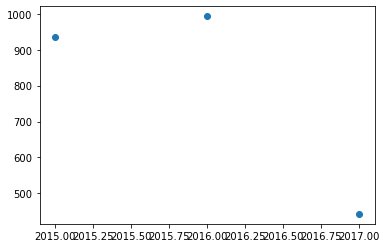

In [10]:
funding = pd.DataFrame(df.year.value_counts())
x = list(pd.DataFrame(df.year.value_counts()).index)
y = list(funding.year)
plt.scatter(x,y)

In [11]:
funding.columns = ['Number of Fundings']
funding

,Number of Fundings
2016,993
2015,936
2017,443


In [12]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


In [13]:
df.CityLocation = df.CityLocation.str.title()

In [14]:
df['CityLocation']=df['CityLocation'].replace({'New Delhi':'Delhi'},regex=True)

In [15]:
cities = pd.DataFrame(df.CityLocation.value_counts().head(10))
cities.columns=['Number of startups']
cities

,Number of startups
Bangalore,628
Mumbai,446
Delhi,385
Gurgaon,240
Pune,84
Noida,78
Hyderabad,76
Chennai,66
Ahmedabad,35
Jaipur,25


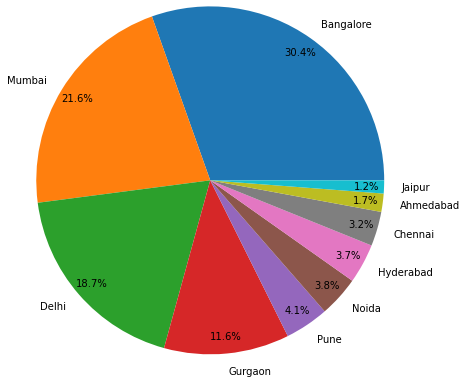

In [16]:
sizes = list(cities['Number of startups'])
labels = cities['Number of startups'].index
# colour = np.arange(len(sizes)) can't be passed like this
plt.pie(sizes, labels = labels, autopct = '%0.1f%%',radius = 2,pctdistance=0.9)
plt.show()

In [17]:
df.CityLocation.replace({"/":" "},regex=True).unique()

array(['Bangalore', 'Mumbai', 'Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Bangalore  Bangkok', 'Hubli', 'Kerala', 'Kozhikode', 'Us',
       'Coimbatore', 'Siliguri', nan, 'Usa', 'Lucknow', 'Kanpur',
       'Sfo   Bangalore', 'London', 'Seattle   Bangalore', 'Pune Seattle',
       'Pune   Dubai', 'Bangalore   Sfo', 'Varanasi', 'Bhopal',
       'Delhi   Us', 'Mumbai   Uk', 'Jodhpur', 'Hyderabad Usa', 'Boston',
       'Bangalore   Palo Alto', 'Mumbai   Ny', 'Usa India',
       'Goa Hyderabad', 'Noida   Singapore', 'Belgaum', 'Pune   Us',
       'Chennai  Singapore', 'Pune   Singapore', 'Bangalore   San Mateo',
       'New York  India', 'Us India', 'Gurgaon   Sfo', 'Bangalore   Usa',
       'Delhi  Houston', 'Nagpur', 'Mumbai   Global', 'India   Us',
       'Udaipur

In [18]:
df.CityLocation.str.contains("/")

0       False
1       False
2       False
3       False
4       False
        ...  
2367      NaN
2368      NaN
2369      NaN
2370      NaN
2371      NaN
Name: CityLocation, Length: 2372, dtype: object

In [19]:
z = pd.Series(df.CityLocation.replace({"/":" "},regex=True).unique())

In [20]:
for i in z:
    b=z.str.contains(" ")
b

0     False
1     False
2     False
3     False
4     False
      ...  
65     True
66     True
67    False
68     True
69     True
Length: 70, dtype: object

In [21]:
list1 = []
for i in range(len(z)):
    if b[i] == True:
        limit=z[i].index(' ')
        x = z[i][0:limit]
        list1.append(x)
    else:
        list1.append(z[i])
print(list1)

['Bangalore', 'Mumbai', 'Delhi', 'Hyderabad', 'Ahmedabad', 'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore', 'Hubli', 'Kerala', 'Kozhikode', 'Us', 'Coimbatore', 'Siliguri', nan, 'Usa', 'Lucknow', 'Kanpur', 'Sfo', 'London', 'Seattle', 'Pune', 'Pune', 'Bangalore', 'Varanasi', 'Bhopal', 'Delhi', 'Mumbai', 'Jodhpur', 'Hyderabad', 'Boston', 'Bangalore', 'Mumbai', 'Usa', 'Goa', 'Noida', 'Belgaum', 'Pune', 'Chennai', 'Pune', 'Bangalore', 'New', 'Us', 'Gurgaon', 'Bangalore', 'Delhi', 'Nagpur', 'Mumbai', 'India', 'Udaipur', 'Delhi', 'Dallas']


In [22]:
### THE CODE STARTING FROM HERE IS TO CONVERT DELHI TO NEW DELHI WITHOUT CHANGING THE RESULTS

In [23]:
df['CityLocation']=df['CityLocation'].replace({'Delhi':'New Delhi'},regex=True)

In [24]:
cities = pd.DataFrame(df.CityLocation.value_counts().head(10))
cities.columns=['Number of startups']
cities

,Number of startups
Bangalore,628
Mumbai,446
New Delhi,385
Gurgaon,240
Pune,84
Noida,78
Hyderabad,76
Chennai,66
Ahmedabad,35
Jaipur,25


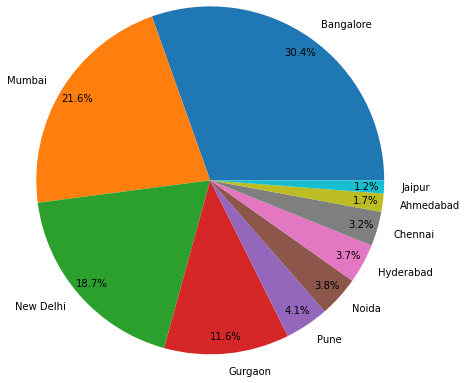

In [25]:
sizes = list(cities['Number of startups'])
labels = cities['Number of startups'].index
# colour = np.arange(len(sizes)) can't be passed like this
plt.pie(sizes, labels = labels, autopct = '%0.1f%%',radius = 2,pctdistance=0.9)
plt.show()

In [26]:
z = pd.Series(df.CityLocation.replace({"/":" "},regex=True).unique())

In [27]:
df.CityLocation.str.contains("/")

0       False
1       False
2       False
3       False
4       False
        ...  
2367      NaN
2368      NaN
2369      NaN
2370      NaN
2371      NaN
Name: CityLocation, Length: 2372, dtype: object

In [28]:
list1 = []
for i in range(len(z)):
    if b[i] == True:
        limit=z[i].index(' ')
        x = z[i][0:limit]
        list1.append(x)
    else:
        list1.append(z[i])
print(list1)

['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad', 'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore', 'Hubli', 'Kerala', 'Kozhikode', 'Us', 'Coimbatore', 'Siliguri', nan, 'Usa', 'Lucknow', 'Kanpur', 'Sfo', 'London', 'Seattle', 'Pune', 'Pune', 'Bangalore', 'Varanasi', 'Bhopal', 'New', 'Mumbai', 'Jodhpur', 'Hyderabad', 'Boston', 'Bangalore', 'Mumbai', 'Usa', 'Goa', 'Noida', 'Belgaum', 'Pune', 'Chennai', 'Pune', 'Bangalore', 'New', 'Us', 'Gurgaon', 'Bangalore', 'New', 'Nagpur', 'Mumbai', 'India', 'Udaipur', 'New', 'Dallas']


In [29]:
### THE CODE ENDING HERE IS TO CONVERT DELHI TO NEW DELHI WITHOUT CHANGING THE RESULTS

In [30]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


In [31]:
le = pd.DataFrame(df.groupby('CityLocation').count()['AmountInUSD'])

In [32]:
city_percent = le.sort_values(by='AmountInUSD',ascending = False).head(10)

In [33]:
city_percent

,AmountInUSD
CityLocation,
Bangalore,405
Mumbai,300
New Delhi,213
Gurgaon,165
Pune,54
Hyderabad,53
Chennai,47
Noida,45
Ahmedabad,25


In [34]:
percent = []
summa = city_percent.AmountInUSD.sum()
for i in range(city_percent.shape[0]):
    percent.append(city_percent.iloc[i]*100/summa)
print(percent)

[AmountInUSD    30.751708
Name: Bangalore, dtype: float64, AmountInUSD    22.779043
Name: Mumbai, dtype: float64, AmountInUSD    16.173121
Name: New Delhi, dtype: float64, AmountInUSD    12.528474
Name: Gurgaon, dtype: float64, AmountInUSD    4.100228
Name: Pune, dtype: float64, AmountInUSD    4.024298
Name: Hyderabad, dtype: float64, AmountInUSD    3.568717
Name: Chennai, dtype: float64, AmountInUSD    3.416856
Name: Noida, dtype: float64, AmountInUSD    1.898254
Name: Ahmedabad, dtype: float64, AmountInUSD    0.759301
Name: Jaipur, dtype: float64]


In [35]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


In [36]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [37]:
df.InvestmentType.replace({'PrivateEquity':'Private Equity','Crowd funding':'Crowd Funding','SeedFunding':'Seed Funding'},regex=True,inplace=True)

In [38]:
df.InvestmentType.fillna('Seed Funding',inplace=True)

In [39]:
Investment = pd.DataFrame(df.InvestmentType.value_counts())
Investment

,InvestmentType
Seed Funding,1302
Private Equity,1067
Crowd Funding,2
Debt Funding,1


In [40]:
percent = []
summa = Investment.InvestmentType.sum()
for i in range(Investment.shape[0]):
    percent.append(Investment.iloc[i]*100/summa)
print(percent)

[InvestmentType    54.890388
Name: Seed Funding, dtype: float64, InvestmentType    44.983137
Name: Private Equity, dtype: float64, InvestmentType    0.084317
Name: Crowd Funding, dtype: float64, InvestmentType    0.042159
Name: Debt Funding, dtype: float64]


In [41]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


In [42]:
top_ind = pd.DataFrame(df.IndustryVertical.value_counts().head(5))

In [43]:
top_ind

,IndustryVertical
Consumer Internet,772
Technology,313
eCommerce,171
ECommerce,53
Healthcare,30


In [44]:
percent = []
summa = top_ind.IndustryVertical.sum()
for i in range(top_ind.shape[0]):
    percent.append(top_ind.iloc[i]*100/summa)
    print(top_ind.index[i],round(percent[i][0],2))

Consumer Internet 57.65
Technology 23.38
eCommerce 12.77
ECommerce 3.96
Healthcare 2.24


In [45]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


In [46]:
print(df.StartupName.unique())

['TouchKin' 'Ethinos' 'Leverage Edu' ... 'Graphene' 'Simplotel'
 'couponmachine.in']


In [47]:
s = df[['AmountInUSD','StartupName']]
s.sort_values(by=['AmountInUSD','StartupName'],ascending=True)

,AmountInUSD,StartupName
2292,"1,000,000",20Dresses
1158,"1,000,000",Aahaa
2073,"1,000,000",AdWyze
845,"1,000,000",Adytude
148,"1,000,000",Aequm
...,...,...
1126,NaN,mishTag
1877,NaN,rBus
878,NaN,underDOGS
526,NaN,vImmune


In [48]:
df.AmountInUSD.fillna(0,inplace=True)

In [49]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,01 08 2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02 08 2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0,NaN,2017
2,2,02 08 2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0,NaN,2017
3,3,02 08 2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02 08 2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...
2367,2367,29 01 2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN,2015
2368,2368,29 01 2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund,2015
2369,2369,30 01 2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN,2015
2370,2370,30 01 2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",2015


In [102]:
a = pd.DataFrame(df.groupby(['StartupName']).count()['year'])
a['year'].sort_values().index[-1]

'Swiggy'

In [115]:
df['InvestorsName'].value_counts().index[:5]

Index(['Undisclosed Investors', 'Undisclosed investors', 'Ratan Tata',
       'Indian Angel Network', 'Kalaari Capital'],
      dtype='object')